## One-way ANOVA within subject
### 1. Importing the libraries
First, let us set the environment by importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

### 2. Data visualization and descriptive statistics: An example
Let us now consider a different example: During the pandemic the university of Oldenburg offered remote courses for one year to cope with the restrictions on gathering with others. It isn't clear whether 1) offering online lectures, 2) providing previously recorded lectures or 3) simply uploading learning materials worked best in terms of learning outcomes. To answer this question, one hundred students were recruited to participate in a study. All participants experienced all 3 types of learning strategies (independent variable with 3 levels) and took a test that measured the amount of content learned (dependent variable).

First, let us load and explore the data. Be aware of the difference between this data frame and the one we worked with in the previous section. One of them is a long-format data frame, whereas the other one is a wide-format data frame.

In [8]:
# Read the CSV file using a relative path
learn_data = pd.read_csv("../ANOVA_and_ANCOVA/Datasets/learn_data.csv")

# Display the first few rows of the dataframe
print(learn_data.head())

   student      mode   learning
0        1      live  88.452760
1        1  recorded  32.321198
2        1  material  71.672626
3        2      live  54.544869
4        2  recorded  50.887183


Now, let us explore the data using `describe()` to show the means and other descriptive statistics.

In [9]:
# Get a summary of statistics
summary = learn_data.describe()

# Display the summary
print(summary)

          student    learning
count  300.000000  300.000000
mean    50.500000   54.532774
std     28.914301   28.186536
min      1.000000    0.974114
25%     25.750000   32.123860
50%     50.500000   54.431410
75%     75.250000   79.455071
max    100.000000   99.509591


Boxplots provide an overview of the data distribution and some intuition as to the results we might expect. In addition, boxplots enable us to identify potential outliers, which should be removed as part of a preprocessing (data cleaning) step prior to data analysis. The following code chunk illustrates code for creating boxplots using `boxplot()`. Run it to see what happens.

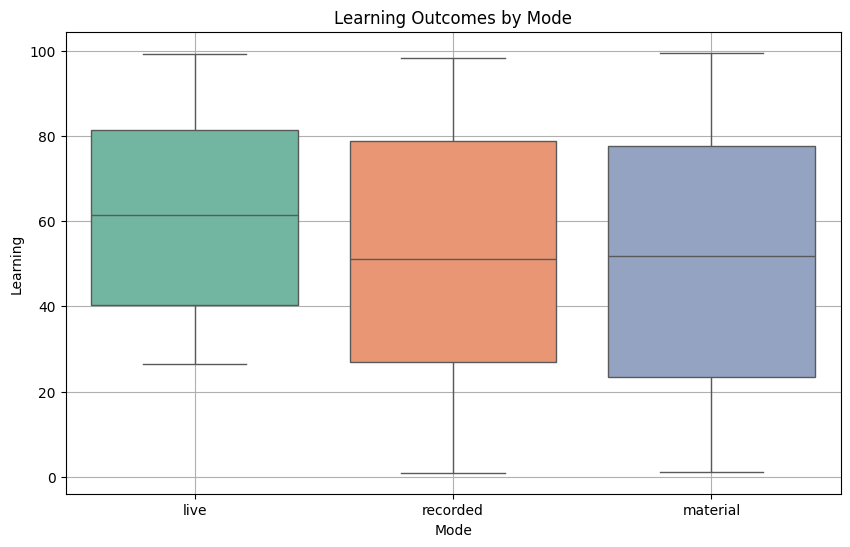

In [4]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=learn_data, x='mode', y='learning', palette='Set2')

# Customize the plot
plt.xlabel("Mode")
plt.ylabel("Learning")
plt.title("Learning Outcomes by Mode")
plt.grid(True)

# Show the plot
plt.show()

### 3. ANOVA

Now we can run the one-way within-subjects ANOVA. The function includes the dependent variable and an argument specifying the "unit" or "observation" column (in this case "student"). That is, the variable specifying the observations that underwent the different levels of the independent variable.

In [16]:
# Perform one-way within-subjects ANOVA
anova2 = pg.rm_anova(dv='learning', within='mode', subject='student', data=learn_data, detailed=False)

# Display the ANOVA results
print(anova2)

  Source  ddof1  ddof2         F     p-unc       ng2      eps
0   mode      2    198  4.662057  0.010508  0.030181  0.97248


In [15]:
# Fit the model using statsmodels for within-subjects ANOVA
aovrm = AnovaRM(data=learn_data, depvar='learning', subject='student', within=['mode'])
anova_results = aovrm.fit()

# Display the ANOVA results
print(anova_results)


               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
mode  4.6621 2.0000 198.0000 0.0105



### 4. Interpretation
The mode factor has a statistically significant effect on the learning variable (p = 0.010508)

### 5. Post hoc Analysis
As in the previous examples, in case of significant results, post hoc analysis must be conducted. TukeyHSD() does not work with within-subjects ANOVA objects easily. Therefore, we can use an alternative function from the `pingouin` package: `pairwise_ttest()`.

In [7]:
# Perform pairwise t-tests with Bonferroni correction
pairwise_results = pg.pairwise_ttests(dv='learning', within='mode', subject='student', data=learn_data, padjust='bonferroni')

# Display the pairwise t-test results
print(pairwise_results)

  Contrast         A         B  Paired  Parametric         T   dof  \
0     mode      live  material    True        True  2.976556  99.0   
1     mode      live  recorded    True        True  2.521594  99.0   
2     mode  material  recorded    True        True -0.291264  99.0   

  alternative     p-unc    p-corr    p-adjust   BF10    hedges  
0   two-sided  0.003664  0.010993  bonferroni  6.908  0.414810  
1   two-sided  0.013278  0.039834  bonferroni  2.226  0.359716  
2   two-sided  0.771459  1.000000  bonferroni  0.115 -0.040501  


We observe a significant effect of learning strategies. Specifically, live lectures seem to outperform the other two methodologies. Note that Bonferroni correction for multiple testing has been employed. 